In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [29]:
train_df=pd.read_csv('D:\\Datascience\\datas\\titanic_train.csv')  # reading train file

In [30]:
test_df=pd.read_csv('D:\\Datascience\\datas\\titanic_test.csv')

lets do some data understanding

In [31]:
test_df.shape

(418, 11)

In [32]:
train_df.shape

(891, 12)

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [35]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5,1,'train data set missing values')

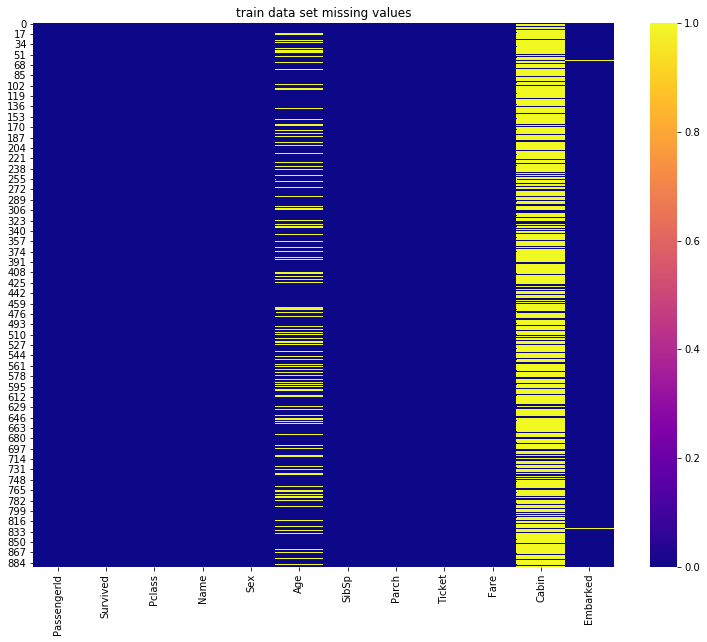

In [38]:
plt.figure(figsize=(13,10))
sns.heatmap(train_df.isnull(),xticklabels=train_df.columns,cmap='plasma')
plt.title('train data set missing values')

Text(0.5,1,'test dataset missing values')

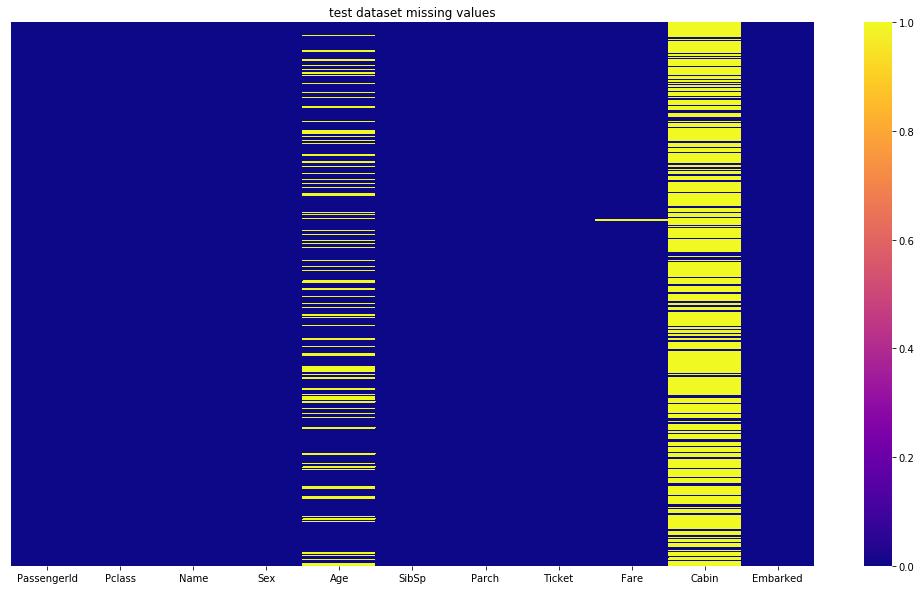

In [39]:
plt.figure(figsize=(18,10))
sns.heatmap(test_df.isnull(),yticklabels=False, xticklabels=test_df.columns, cmap='plasma')
plt.title('test dataset missing values')

We can variables like cabin and and Age has to many nan values. Since Survived is the target variable we see this bariable only in the  training data set
now lets start treating the nan values for Age and Cabin

In [40]:
train_df['Cabin'].tail()

886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, dtype: object

In [41]:
train_df['Cabin'].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
D                  3
C22 C26            3
F33                3
E101               3
F2                 3
D20                2
C126               2
C83                2
B5                 2
E25                2
C52                2
D33                2
C124               2
B49                2
D26                2
D35                2
B51 B53 B55        2
C2                 2
C78                2
F4                 2
B18                2
C93                2
E121               2
B58 B60            2
C125               2
C123               2
B57 B59 B63 B66    2
                  ..
B79                1
E77                1
D28                1
D37                1
E12                1
B38                1
E63                1
D48                1
E50                1
C70                1
B94                1
E49                1
C110               1
A7                 1
C47                1
D6                 1
A36          

dealing with Cabin Variable is tricky

In [42]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Fare']=dataset['Fare'].fillna(dataset['Fare'].mean())
    dataset['Embarked']=dataset['Embarked'].fillna(dataset['Embarked'].value_counts().index[0])

In [43]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Visualization 

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


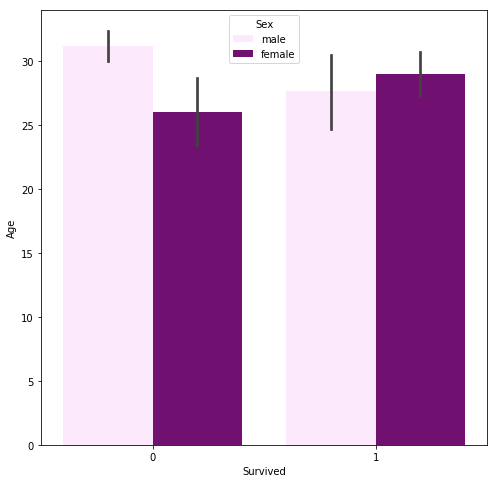

In [44]:
plt.figure(figsize=(8,8))
sns.barplot(x='Survived',y='Age',hue='Sex',data=train_df, color='purple')

We can see that the survival rate of women in higher than that of men. now lets see the distbuition of age

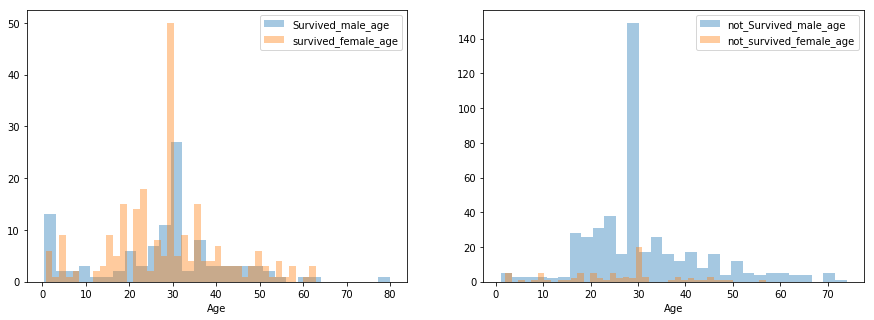

In [45]:
survived=train_df[train_df['Survived']==1]
not_survived=train_df[train_df['Survived']==0]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(survived[survived['Sex']=='male'].Age,bins=30, label='Survived_male_age',kde=False)
sns.distplot(survived[survived['Sex']=='female'].Age,bins=40,label='survived_female_age',kde=False)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(not_survived[not_survived['Sex']=='male'].Age,bins=30, label='not_Survived_male_age',kde=False)
sns.distplot(not_survived[not_survived['Sex']=='female'].Age,bins=40,label='not_survived_female_age',kde=False)
plt.legend()
plt.show()

We can clearly see that women between age group of 20 to 30 have higher chances of survival. Also babies have a higher chances of survival. men have very low chance od survival.

In [46]:
size=[survived.Sex[survived['Sex']=='male'].count(),survived.Sex[survived['Sex']=='female'].count(),not_survived.Sex[not_survived['Sex']=='male'].count(),not_survived.Sex[not_survived['Sex']=='female'].count()]

In [47]:
size

[109, 233, 468, 81]

In [48]:
labels=['Male_survived', 'Female_survived','Male_not_Survived','Female_not_survived']

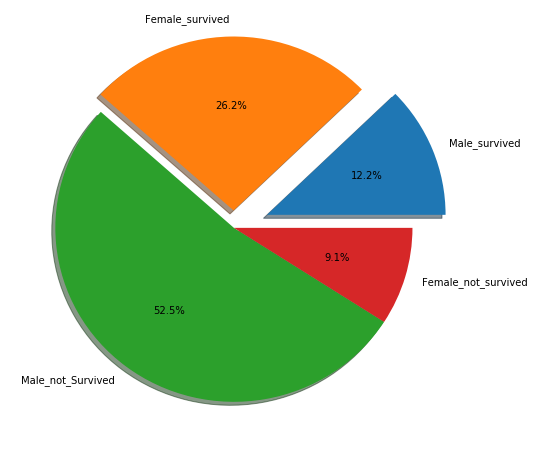

In [49]:
plt.figure(figsize=(8,8))
plt.pie(size,labels=labels,autopct='%1.1f%%',shadow=True, explode=(0.2,0.1,0,0))
plt.show()

the above pie chart explains the % of male and female survival rate 

Now lest see if there is any relatioship between PClass, Embarked and survival rate

C:\Users\Antony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Antony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

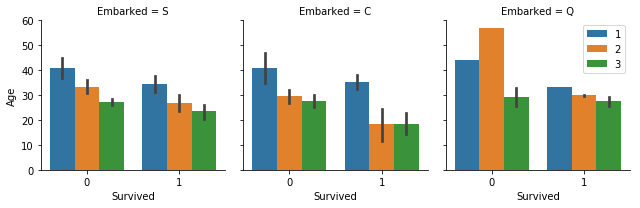

In [50]:
plt.figure(figsize=(10,10))
FacetGrid=sns.FacetGrid(train_df,col='Embarked')
FacetGrid.map(sns.barplot,'Survived','Age','Pclass', palette=colour)
plt.legend()
plt.show()

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


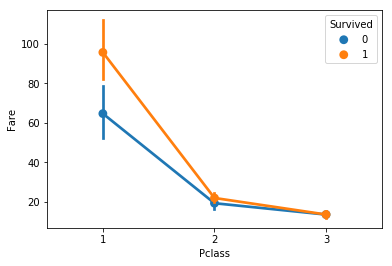

In [51]:
sns.pointplot(train_df['Pclass'],train_df['Fare'],train_df['Survived'])

a section of Pclass=1, with Fare range higher than 80 had higher survival chances. 

In [52]:
dataset=[train_df,test_df]
for data in dataset:
    data['Relatives']=data['Parch']+data['SibSp']
    data.loc[data['Relatives']==0,'Alone']=1
    data.loc[data['Relatives']==1,'Alone']=0
    data['Alone']=data['Alone'].astype('category')

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


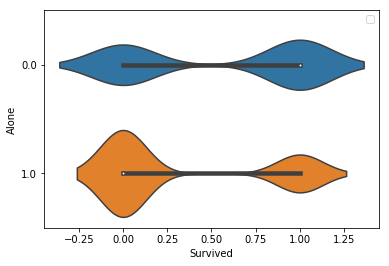

In [53]:
sns.violinplot(x=train_df['Survived'],y=train_df['Alone'], palette=colour)
plt.legend()

from the above plot we can infer that the chances of survival when you are not alone, and chances of not surviving when you are alone are high. 

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


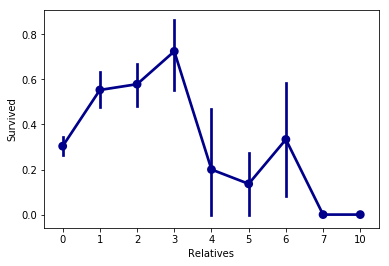

In [54]:
sns.pointplot(x=train_df['Relatives'], y=train_df['Survived'], color='DarkBlue')

The Survival chance of family with less that 3 has higher chances of survival, As the family size increases... the survival chances decreases

#### Data Preprocessing

In [57]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [59]:
le=LabelEncoder()

In [64]:
for col in train_df[['Sex','Embarked']]:
    train_df[col]=le.fit_transform(train_df[col].astype('str'))

In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,1.0


In [79]:
train_df['Fare']=MinMaxScaler().fit_transform(train_df['Fare'])

ValueError: Expected 2D array, got 1D array instead:
array=[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
   8.05     9.825   14.4583   7.925    7.75    21.     247.5208  31.275
  73.5      8.05    30.0708  13.      77.2875  11.2417   7.75     7.1417
  22.3583   6.975    7.8958   7.05    14.5     26.      13.      15.0458
  26.2833  53.1      9.2167  79.2     15.2458   7.75    15.85     6.75
  11.5     36.75     7.7958  34.375   26.      13.      12.525   66.6
   8.05    14.5      7.3125  61.3792   7.7333   8.05     8.6625  69.55
  16.1     15.75     7.775    8.6625  39.6875  20.525   55.      27.9
  25.925   56.4958  33.5     29.125   11.1333   7.925   30.6958   7.8542
  25.4667  28.7125  13.       0.      69.55    15.05    31.3875  39.
  22.025   50.      15.5     26.55    15.5      7.8958  13.      13.
   7.8542  26.      27.7208 146.5208   7.75     8.4042   7.75    13.
   9.5     69.55     6.4958   7.225    8.05    10.4625  15.85    18.7875
   7.75    31.       7.05    21.       7.25    13.       7.75   113.275
   7.925   27.      76.2917  10.5      8.05    13.       8.05     7.8958
  90.       9.35    10.5      7.25    13.      25.4667  83.475    7.775
  13.5     31.3875  10.5      7.55    26.      26.25    10.5     12.275
  14.4542  15.5     10.5      7.125    7.225   90.       7.775   14.5
  52.5542  26.       7.25    10.4625  26.55    16.1     20.2125  15.2458
  79.2     86.5    512.3292  26.       7.75    31.3875  79.65     0.
   7.75    10.5     39.6875   7.775  153.4625 135.6333  31.       0.
  19.5     29.7      7.75    77.9583   7.75     0.      29.125   20.25
   7.75     7.8542   9.5      8.05    26.       8.6625   9.5      7.8958
  13.       7.75    78.85    91.0792  12.875    8.85     7.8958  27.7208
   7.2292 151.55    30.5    247.5208   7.75    23.25     0.      12.35
   8.05   151.55   110.8833 108.9     24.      56.9292  83.1583 262.375
  26.       7.8958  26.25     7.8542  26.      14.     164.8667 134.5
   7.25     7.8958  12.35    29.      69.55   135.6333   6.2375  13.
  20.525   57.9792  23.25    28.5    153.4625  18.     133.65     7.8958
  66.6    134.5      8.05    35.5     26.     263.      13.      13.
  13.      13.      13.      16.1     15.9      8.6625   9.225   35.
   7.2292  17.8      7.225    9.5     55.      13.       7.8792   7.8792
  27.9     27.7208  14.4542   7.05    15.5      7.25    75.25     7.2292
   7.75    69.3     55.4417   6.4958   8.05   135.6333  21.075   82.1708
   7.25   211.5      4.0125   7.775  227.525   15.7417   7.925   52.
   7.8958  73.5     46.9     13.       7.7292  12.     120.       7.7958
   7.925  113.275   16.7      7.7958   7.8542  26.      10.5     12.65
   7.925    8.05     9.825   15.85     8.6625  21.       7.75    18.75
   7.775   25.4667   7.8958   6.8583  90.       0.       7.925    8.05
  32.5     13.      13.      24.15     7.8958   7.7333   7.875   14.4
  20.2125   7.25    26.      26.       7.75     8.05    26.55    16.1
  26.       7.125   55.9    120.      34.375   18.75   263.      10.5
  26.25     9.5      7.775   13.       8.1125  81.8583  19.5     26.55
  19.2583  30.5     27.75    19.9667  27.75    89.1042   8.05     7.8958
  26.55    51.8625  10.5      7.75    26.55     8.05    38.5     13.
   8.05     7.05     0.      26.55     7.725   19.2583   7.25     8.6625
  27.75    13.7917   9.8375  52.      21.       7.0458   7.5208  12.2875
  46.9      0.       8.05     9.5875  91.0792  25.4667  90.      29.7
   8.05    15.9     19.9667   7.25    30.5     49.5042   8.05    14.4583
  78.2667  15.1    151.55     7.7958   8.6625   7.75     7.6292   9.5875
  86.5    108.9     26.      26.55    22.525   56.4958   7.75     8.05
  26.2875  59.4      7.4958  34.0208  10.5     24.15    26.       7.8958
  93.5      7.8958   7.225   57.9792   7.2292   7.75    10.5    221.7792
   7.925   11.5     26.       7.2292   7.2292  22.3583   8.6625  26.25
  26.55   106.425   14.5     49.5     71.      31.275   31.275   26.
 106.425   26.      26.      13.8625  20.525   36.75   110.8833  26.
   7.8292   7.225    7.775   26.55    39.6    227.525   79.65    17.4
   7.75     7.8958  13.5      8.05     8.05    24.15     7.8958  21.075
   7.2292   7.8542  10.5     51.4792  26.3875   7.75     8.05    14.5
  13.      55.9     14.4583   7.925   30.     110.8833  26.      40.125
   8.7125  79.65    15.      79.2      8.05     8.05     7.125   78.2667
   7.25     7.75    26.      24.15    33.       0.       7.225   56.9292
  27.       7.8958  42.4      8.05    26.55    15.55     7.8958  30.5
  41.5792 153.4625  31.275    7.05    15.5      7.75     8.05    65.
  14.4     16.1     39.      10.5     14.4542  52.5542  15.7417   7.8542
  16.1     32.3208  12.35    77.9583   7.8958   7.7333  30.       7.0542
  30.5      0.      27.9     13.       7.925   26.25    39.6875  16.1
   7.8542  69.3     27.9     56.4958  19.2583  76.7292   7.8958  35.5
   7.55     7.55     7.8958  23.       8.4333   7.8292   6.75    73.5
   7.8958  15.5     13.     113.275  133.65     7.225   25.5875   7.4958
   7.925   73.5     13.       7.775    8.05    52.      39.      52.
  10.5     13.       0.       7.775    8.05     9.8417  46.9    512.3292
   8.1375  76.7292   9.225   46.9     39.      41.5792  39.6875  10.1708
   7.7958 211.3375  57.      13.4167  56.4958   7.225   26.55    13.5
   8.05     7.7333 110.8833   7.65   227.525   26.2875  14.4542   7.7417
   7.8542  26.      13.5     26.2875 151.55    15.2458  49.5042  26.55
  52.       9.4833  13.       7.65   227.525   10.5     15.5      7.775
  33.       7.0542  13.      13.      53.1      8.6625  21.       7.7375
  26.       7.925  211.3375  18.7875   0.      13.      13.      16.1
  34.375  512.3292   7.8958   7.8958  30.      78.85   262.375   16.1
   7.925   71.      20.25    13.      53.1      7.75    23.      12.475
   9.5      7.8958  65.      14.5      7.7958  11.5      8.05    86.5
  14.5      7.125    7.2292 120.       7.775   77.9583  39.6      7.75
  24.15     8.3625   9.5      7.8542  10.5      7.225   23.       7.75
   7.75    12.475    7.7375 211.3375   7.2292  57.      30.      23.45
   7.05     7.25     7.4958  29.125   20.575   79.2      7.75    26.
  69.55    30.6958   7.8958  13.      25.9292   8.6833   7.2292  24.15
  13.      26.25   120.       8.5167   6.975    7.775    0.       7.775
  13.      53.1      7.8875  24.15    10.5     31.275    8.05     0.
   7.925   37.0042   6.45    27.9     93.5      8.6625   0.      12.475
  39.6875   6.95    56.4958  37.0042   7.75    80.      14.4542  18.75
   7.2292   7.8542   8.3     83.1583   8.6625   8.05    56.4958  29.7
   7.925   10.5     31.       6.4375   8.6625   7.55    69.55     7.8958
  33.      89.1042  31.275    7.775   15.2458  39.4     26.       9.35
 164.8667  26.55    19.2583   7.2292  14.1083  11.5     25.9292  69.55
  13.      13.      13.8583  50.4958   9.5     11.1333   7.8958  52.5542
   5.       9.      24.       7.225    9.8458   7.8958   7.8958  83.1583
  26.       7.8958  10.5167  10.5      7.05    29.125   13.      30.
  23.45    30.       7.75  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.